<a href="https://colab.research.google.com/github/harnalashok/Clustering/blob/master/Why_normalize_in_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Last amended: 14th May, 2002
# My folder:
# Ref: https://stats.stackexchange.com/a/283941/78454
# Objectives:
#             What happens if data is not normalized before using KMeans
#             (Incorrect clusters are created)

### Libraries

In [1]:
# 1.0 Call libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# 1.1
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### A simple experiment
Learning to work with numpy arrays

In [14]:
# 2.0  Create random data
#      Syntax: random.randn(d0, d1, ..., dn)
#      Returns a sample (or samples) from the “standard normal” distribution.
#      In a "standard normal distribution" mean is 0 and stddev is 1

rnorm = np.random.randn  # Rename numpy function object
rnorm(10)                # Get 10 points. 
                         # Values vary between -2 and +2 with 95% probability                

array([ 0.36561181, -1.26889551, -0.10610207,  0.91205654, -0.15808693,
        0.6618509 ,  0.89118224, -1.8757104 ,  0.78937561, -0.61471799])

In [41]:
# 2.1 Create 10 random points:

x = rnorm(10) * 10    # 10 times the usual values
x

array([  3.41164872, -12.69728288,   4.14399047,   6.32987418,
        14.23363731,  -1.25328194,   8.84897452,  -0.10296677,
        12.96659809,  -6.8262942 ])

In [36]:
# 2.2   We also create points along y-axis below
#        But check what np.concatenate() does when axis=0
#        Output is just one concatenated array

y = np.concatenate(
                    [
                      rnorm(5),       # An array of 5ts
                      rnorm(5) + 5    # IInd array of 5pts
                                        #   but center is 5 units above the earlier
                    ],
                   axis = 0             # Being one dimensional only one axis is available
                   )

# 2.2.1
y

array([-0.1399141 ,  0.82313119,  0.27599503,  0.16947866,  0.36729186,
        3.99882591,  2.51248546,  3.62009818,  5.71145496,  4.4872901 ])

In [40]:
# 2.2.2 Transpose two side-by-side arrays: x,y

print("\n\n====Before transpose====\n")
z = np.array([x,y])    # Put x and y, one after another
z                      # Check also shape of z1

print("\n\n====After transpose====\n")

z1 = np.array([x,y]).T
z1    # (x,y) are paired, row-by-row
     # Check also shape of z

array([[-0.92445233, -0.6649505 , -0.41510784, -0.55056947, -2.08825401,
         1.00812462,  0.71745892, -0.33077301, -0.5884909 ,  0.73166924],
       [-0.1399141 ,  0.82313119,  0.27599503,  0.16947866,  0.36729186,
         3.99882591,  2.51248546,  3.62009818,  5.71145496,  4.4872901 ]])



====After transpose====



array([[-0.92445233, -0.1399141 ],
       [-0.6649505 ,  0.82313119],
       [-0.41510784,  0.27599503],
       [-0.55056947,  0.16947866],
       [-2.08825401,  0.36729186],
       [ 1.00812462,  3.99882591],
       [ 0.71745892,  2.51248546],
       [-0.33077301,  3.62009818],
       [-0.5884909 ,  5.71145496],
       [ 0.73166924,  4.4872901 ]])

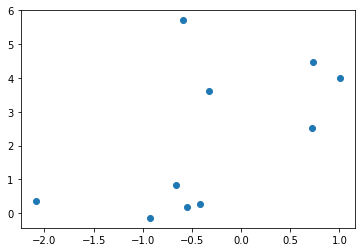

In [44]:
plt.scatter(z1[:,0], z1[:,1]) ;

### Create and plot data now

In [ ]:
# 2.1
x = rnorm(1000) * 10            # Values along x-axis are 10 times higher
                                #  than that on y-axis (see below)
                                # Multiplication by 10 implies data is no longer normalized
                                #  While mean remains as 0, stddev increases to 10.
#x

In [ ]:
# 2.2 So now get y
y = np.concatenate(
                    [
                      rnorm(500),       # An array of 500pts
                      rnorm(500) + 5    # IInd array of 500pts
                                        #   but center is 5 units above the earlier
                    ],
                   axis = 0             # Being one dimensional only one axis is available
                   )

y.shape

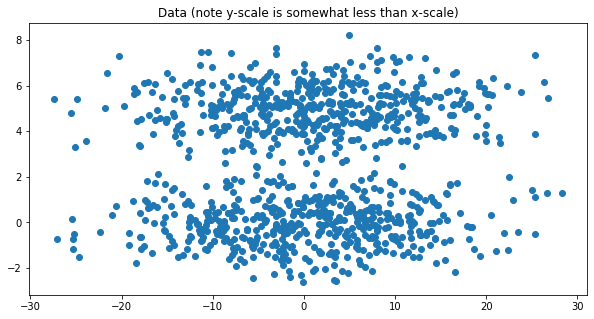

In [24]:
# 4.0 Plot the data:
fig, axes = plt.subplots(1, 1, figsize = (10,5))  
axes.scatter(x, y)  # Plot clusters
axes.set_title('Data (note y-scale is somewhat less than x-scale)')
plt.show() ;

### Perform kmeans
And plot clusters

In [12]:
# 4.1 Kmeans now
km = KMeans(2)  # We create 2 clusters
clusters = km.fit_predict(np.array([x, y]).T)   # Un-normalized data
clusters[:5]

array([1, 0, 1, 1, 1], dtype=int32)

ValueError: ignored

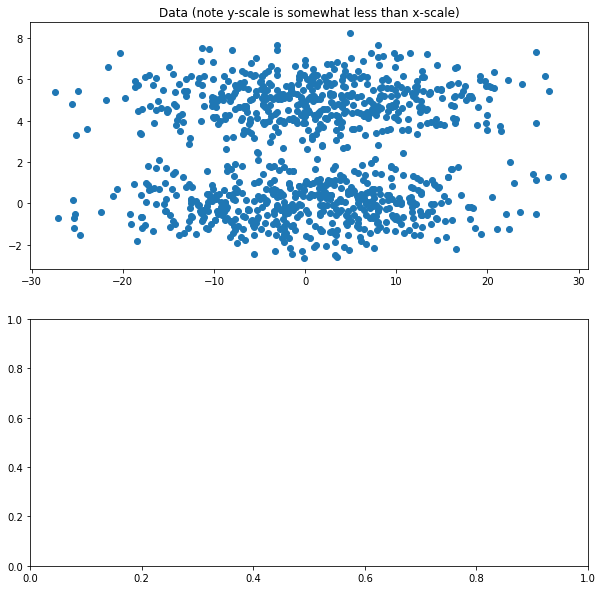

In [28]:
# 5.0 Make two plots 

# 5.1 One of data, as it is
fig, axes = plt.subplots(2, 1, figsize = (10,10))
axes[0].scatter(x, y)  # Plot clusters
axes[0].set_title('Data (note y-scale is somewhat less than x-scale)')


# 5.2 Next, of clustered data: No normalization
km = KMeans(2)  # We create 2 clusters
clusters = km.fit_predict(np.array([x, y]).T)   # Un-normalized data
axes[1].scatter(x, y, c=clusters, cmap='bwr')   # 'bwr' ==> blue, white, red
axes[1].set_title('non-normalised K-means--Wrong clustering')


# 5.3 Show all plots
plt.show();
############################

### Normalization

In [ ]:
# 5.3 Of normalized clustered data
clusters = km.fit_predict(np.array([x / 20, y/2]).T) # Normalized data
axes[2].scatter(x/20, y/2, c=clusters, cmap='bwr')
axes[2].set_title('Normalised K-means--Good clustering')

# 5.4 Now show all plots
plt.show();
############################

In [ ]:
# Standard normalization
# 2.0.1 Formula for Standard Normalization is: (X - mean(X))/stddev(X)   
#       This is known as standard normalization
#       rnorm() values have mean =0 and stddev = 1


t = rnorm(10)        # t is already normalized. mean=0, stddev = 1
print("\n---")
T = rnorm(10) * 10   # mean = 10, stddev = 10. To Standard Normalize, divide by 10

In [ ]:
# Mon-Max normalization
# 2.0.1 As rnorm() values vary around -2 and +2, one way
#       to normalize it is: (X - mean(X))/stddev(X)   
#       This is known as standard normalization

t = rnorm(10)        # t is already normalized. mean=0, stddev = 1
print("\n---")
T = rnorm(10) * 10   # mean = 10, stddev = 10. To Standard Normalize, divide by 10

In [ ]:
############## I am done ################